In [22]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
from sklearn.datasets import make_moons

In [2]:
print(tf.__version__)

1.14.0


# Linear data

In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df

,Feature 1,Feature 2
0,5.478098,7.203714
1,-8.428483,4.121889
2,-7.905447,3.323639
3,6.411041,5.523013
4,7.288599,6.171226
...,...,...
995,6.208962,5.233968
996,-9.795754,3.502709
997,4.335167,5.928298
998,-8.466632,3.577022


In [4]:
df["Target"] = y

In [5]:
df.head()

,Feature 1,Feature 2,Target
0,5.478098,7.203714,1
1,-8.428483,4.121889,0
2,-7.905447,3.323639,0
3,6.411041,5.523013,1
4,7.288599,6.171226,1


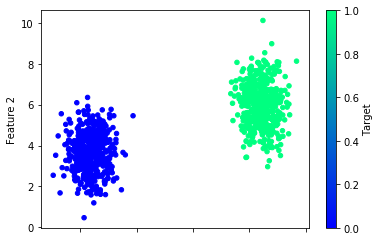

In [6]:
# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [7]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [10]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [12]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
750/750 [==============================] - 0s 162us/sample - loss: 0.7908 - acc: 0.4200
Epoch 2/100
750/750 [==============================] - 0s 31us/sample - loss: 0.7714 - acc: 0.4213
Epoch 3/100
750/750 [==============================] - 0s 25us/sample - loss: 0.7546 - acc: 0.4347
Epoch 4/100
750/750 [==============================] - 0s 36us/sample - loss: 0.7395 - acc: 0.4520
Epoch 5/100
750/750 [==============================] - 0s 24us/sample - loss: 0.7264 - acc: 0.4653
Epoch 6/100
750/750 [==============================] - 0s 31us/sample - loss: 0.7147 - acc: 0.4853
Epoch 7/100
750/750 [==============================] - 0s 35us/sample - loss: 0.7045 - acc: 0.5093
Epoch 8/100
750/750 [==============================] - 0s 35us/sample - loss: 0.6949 - acc: 0.5253
Epoch 9/100
750/750 [==============================] - 0s 24us/sample - loss: 0.6868 - acc: 0.5373
Epoch 10/100
750/750 [==============================] - 0s 29us/sample - loss: 0.6797 - acc: 0.5560
Epoch 11

750/750 [==============================] - 0s 31us/sample - loss: 0.1093 - acc: 1.0000
Epoch 82/100
750/750 [==============================] - 0s 33us/sample - loss: 0.1073 - acc: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 29us/sample - loss: 0.1054 - acc: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 31us/sample - loss: 0.1035 - acc: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 28us/sample - loss: 0.1017 - acc: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 29us/sample - loss: 0.0999 - acc: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 31us/sample - loss: 0.0982 - acc: 1.0000
Epoch 88/100
750/750 [==============================] - 0s 32us/sample - loss: 0.0966 - acc: 1.0000
Epoch 89/100
750/750 [==============================] - 0s 32us/sample - loss: 0.0949 - acc: 1.0000
Epoch 90/100
750/750 [==============================] - 0s 32us/sample - loss: 0.0933 - acc: 1.0000
Epoch 91/100


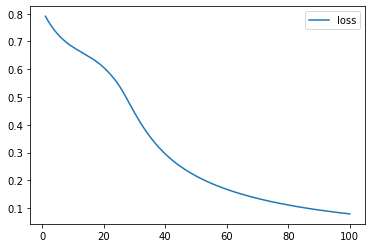

In [15]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

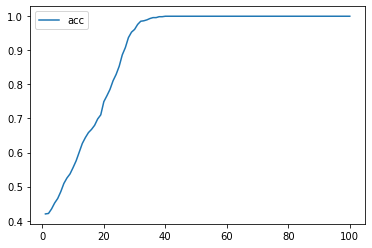

In [18]:
# Plot the accuracy
history_df.plot(y="acc")

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.0745 - acc: 1.0000
Loss: 0.07450046336650848, Accuracy: 1.0


# Non-linear data

In [20]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

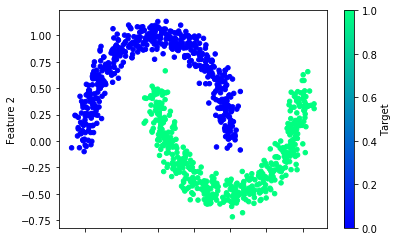

In [24]:
# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [25]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [26]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 27us/sample - loss: 0.6766 - acc: 0.7053
Epoch 2/100
750/750 [==============================] - 0s 24us/sample - loss: 0.6219 - acc: 0.7187
Epoch 3/100
750/750 [==============================] - 0s 29us/sample - loss: 0.5773 - acc: 0.7267
Epoch 4/100
750/750 [==============================] - 0s 35us/sample - loss: 0.5430 - acc: 0.7333
Epoch 5/100
750/750 [==============================] - 0s 32us/sample - loss: 0.5179 - acc: 0.7440
Epoch 6/100
750/750 [==============================] - 0s 29us/sample - loss: 0.4961 - acc: 0.7520
Epoch 7/100
750/750 [==============================] - 0s 31us/sample - loss: 0.4791 - acc: 0.7640
Epoch 8/100
750/750 [==============================] - 0s 29us/sample - loss: 0.4648 - acc: 0.7693
Epoch 9/100
750/750 [==============================] - 0s 31us/sample - loss: 0.4523 - acc: 0.7747
Epoch 10/100
750/750 [==============================] - 0s 32us/sample - loss: 0.4408 - acc: 0.7773
Epoch 11/

750/750 [==============================] - 0s 33us/sample - loss: 0.2630 - acc: 0.8920
Epoch 83/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2628 - acc: 0.8920
Epoch 84/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2625 - acc: 0.8920
Epoch 85/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2623 - acc: 0.8920
Epoch 86/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2621 - acc: 0.8920
Epoch 87/100
750/750 [==============================] - 0s 27us/sample - loss: 0.2619 - acc: 0.8920
Epoch 88/100
750/750 [==============================] - 0s 32us/sample - loss: 0.2617 - acc: 0.8920
Epoch 89/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2614 - acc: 0.8920
Epoch 90/100
750/750 [==============================] - 0s 31us/sample - loss: 0.2613 - acc: 0.8920
Epoch 91/100
750/750 [==============================] - 0s 28us/sample - loss: 0.2611 - acc: 0.8920
Epoch 92/100


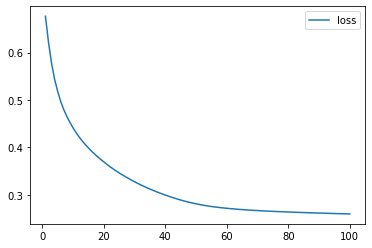

In [27]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

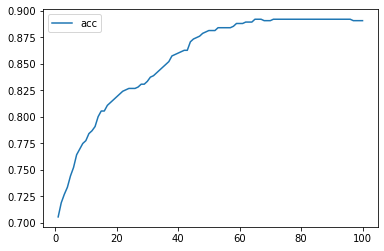

In [29]:
# Plot the loss
history_df.plot(y="acc")

## Non-linear Data with multiple neurons

In [30]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [31]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [32]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 120us/sample - loss: 0.6193 - acc: 0.6320
Epoch 2/100
750/750 [==============================] - 0s 31us/sample - loss: 0.5896 - acc: 0.6707
Epoch 3/100
750/750 [==============================] - 0s 33us/sample - loss: 0.5640 - acc: 0.6973
Epoch 4/100
750/750 [==============================] - 0s 35us/sample - loss: 0.5407 - acc: 0.7093
Epoch 5/100
750/750 [==============================] - 0s 31us/sample - loss: 0.5194 - acc: 0.7200
Epoch 6/100
750/750 [==============================] - 0s 39us/sample - loss: 0.4989 - acc: 0.7493
Epoch 7/100
750/750 [==============================] - 0s 33us/sample - loss: 0.4793 - acc: 0.7840
Epoch 8/100
750/750 [==============================] - 0s 32us/sample - loss: 0.4598 - acc: 0.8067
Epoch 9/100
750/750 [==============================] - 0s 36us/sample - loss: 0.4413 - acc: 0.8227
Epoch 10/100
750/750 [==============================] - 0s 32us/sample - loss: 0.4238 - acc: 0.8400
Epoch 11

750/750 [==============================] - 0s 35us/sample - loss: 0.2216 - acc: 0.9013
Epoch 83/100
750/750 [==============================] - 0s 32us/sample - loss: 0.2212 - acc: 0.9027
Epoch 84/100
750/750 [==============================] - 0s 32us/sample - loss: 0.2209 - acc: 0.9013
Epoch 85/100
750/750 [==============================] - 0s 47us/sample - loss: 0.2207 - acc: 0.9013
Epoch 86/100
750/750 [==============================] - 0s 49us/sample - loss: 0.2202 - acc: 0.9000
Epoch 87/100
750/750 [==============================] - 0s 35us/sample - loss: 0.2200 - acc: 0.9013
Epoch 88/100
750/750 [==============================] - 0s 31us/sample - loss: 0.2197 - acc: 0.9000
Epoch 89/100
750/750 [==============================] - 0s 47us/sample - loss: 0.2195 - acc: 0.9013
Epoch 90/100
750/750 [==============================] - 0s 47us/sample - loss: 0.2192 - acc: 0.9013
Epoch 91/100
750/750 [==============================] - 0s 27us/sample - loss: 0.2189 - acc: 0.9013
Epoch 92/100
